# Reproducible model training 

In [117]:
# Importing required libraries.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
# Visualization condition
fig, ax = plt.subplots()
%matplotlib inline 

import warnings
warnings.filterwarnings("ignore")

In [118]:
df = pd.read_csv('south_german_credit_data_preprocessed.csv',sep=',')
# To display the top 5 rows
df.head(5)

,checking account,duration in month,credit history,credit purpose,credit amount,savings account,employment since..,installment rate,status : sex,other debtors / guarantors,...,property,relationship : age,other installment plans,housing,existing credits,job,people to provide maintenance for,telephone,foreign worker,goodness
0,laufkont,laufzeit,moral,verw,hoehe,sparkont,beszeit,rate,famges,buerge,...,verm,alter,weitkred,wohn,bishkred,beruf,pers,telef,gastarb,kredit
1,1,18,4,2,1049,1,2,4,2,1,...,2,21,3,1,1,3,2,1,2,1
2,1,9,4,0,2799,1,3,2,3,1,...,1,36,3,1,2,3,1,1,2,1
3,2,12,2,9,841,2,4,2,2,1,...,1,23,3,1,1,2,2,1,2,1
4,1,12,4,0,2122,1,3,3,3,1,...,1,39,3,1,2,2,1,1,1,1


In [119]:
df.tail(5) 

,checking account,duration in month,credit history,credit purpose,credit amount,savings account,employment since..,installment rate,status : sex,other debtors / guarantors,...,property,relationship : age,other installment plans,housing,existing credits,job,people to provide maintenance for,telephone,foreign worker,goodness
996,1,24,2,3,1987,1,3,2,3,1,...,1,21,3,1,1,2,1,1,2,0
997,1,24,2,0,2303,1,5,4,3,2,...,1,45,3,2,1,3,2,1,2,0
998,4,21,4,0,12680,5,5,4,3,1,...,4,30,3,3,1,4,2,2,2,0
999,2,12,2,3,6468,5,1,2,3,1,...,4,52,3,2,1,4,2,2,2,0
1000,1,30,2,2,6350,5,5,4,3,1,...,2,31,3,2,1,3,2,1,2,0


It looks like the top rows are good credit risk and bottom are bad. This would require shuffling the data before modelling 

In [120]:
# Checking the data type
df.dtypes

checking account                     object
duration in month                    object
credit history                       object
credit purpose                       object
credit amount                        object
savings account                      object
employment since..                   object
installment rate                     object
status : sex                         object
other debtors / guarantors           object
residence since                      object
property                             object
relationship : age                   object
other installment plans              object
housing                              object
existing credits                     object
job                                  object
people to provide maintenance for    object
telephone                            object
foreign worker                       object
goodness                             object
dtype: object

In [121]:
df.columns = list(df.iloc[0,:])

In [122]:
df = df.iloc[1:,:]

In [123]:
df

,laufkont,laufzeit,moral,verw,hoehe,sparkont,beszeit,rate,famges,buerge,...,verm,alter,weitkred,wohn,bishkred,beruf,pers,telef,gastarb,kredit
1,1,18,4,2,1049,1,2,4,2,1,...,2,21,3,1,1,3,2,1,2,1
2,1,9,4,0,2799,1,3,2,3,1,...,1,36,3,1,2,3,1,1,2,1
3,2,12,2,9,841,2,4,2,2,1,...,1,23,3,1,1,2,2,1,2,1
4,1,12,4,0,2122,1,3,3,3,1,...,1,39,3,1,2,2,1,1,1,1
5,1,12,4,0,2171,1,3,4,3,1,...,2,38,1,2,2,2,2,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
996,1,24,2,3,1987,1,3,2,3,1,...,1,21,3,1,1,2,1,1,2,0
997,1,24,2,0,2303,1,5,4,3,2,...,1,45,3,2,1,3,2,1,2,0
998,4,21,4,0,12680,5,5,4,3,1,...,4,30,3,3,1,4,2,2,2,0
999,2,12,2,3,6468,5,1,2,3,1,...,4,52,3,2,1,4,2,2,2,0


In [124]:
#The columns are in german, in the next steps we will convert the column names into English

dict_col = {'laufkont': 'status',
        'laufzeit': 'duration',
        'moral': 'credit_history',
       'verw':'purpose',
       'hoehe':'amount',
       'sparkont':'savings',
        'beszeit':'employment_duration',
        'rate':'installment_rate',
        'famges':'personal_status_sex',
        'buerge':'other_debtors',
        'wohnzeit':'present_residence',
        'verm':'property',
        'alter':'age',
        'weitkred':'other_installment_plans',
        'wohn':'housing',
        'bishkred':'number_credits',
        'beruf':'job',
        'pers':'people_liable',
        'telef':'telephone',
        'gastarb':'foreign_worker',
        'kredit':'credit_risk'
       }

dict_values= {'status':   {1: 'No Account', 2:'<0 DM', 3:'0-200 DM', 4:'>=200 DM'},
             'credit_history':     {0: 'past delay', 1:'critical/open', 2:'none open', 3:'paid open credits', 4: 'fully paid back'},
             'purpose':     {0: 'others', 1: 'car (new)',2 : 'car (used)',3 : 'furniture/equipment',4 : 'radio/television',5: 'domestic appliances',6:'repairs',7:'education',8:'vacation',9:'retraining',10:'business'},
             'savings':    {1: 'unknown/no savings account',2: '<100 DM',3:'100-500 DM',4:'500-1000 DM',5:'>=1000 DM'},
             'employment_duration': {1: 'unemployed',2:'<1 yr',3: '1-3 yrs',4 :'4-6 yrs',5: '>= 7 yrs'},
             'installment_rate':   {1: '>= 35', 2: '25-34',3 : '20-24',4 : '<20'},
             'personal_status_sex':       {1: 'male : divorced/separated',2: 'female: non-single or male: single',3: 'male : married/widowed',4: 'female : single'},
             'other_debtors': { 1 : 'none', 2: 'co-applicant',3 : 'guarantor'},
             'present_residence':    {1: '< 1 yr',2 : '1-3 yrs',3 : '4-6 yrs',4 : '>= 7 yrs'},
             'property':           {1: 'unknown / no property',2 : 'car or other',3 : 'building soc. savings agr./life insurance',4 : 'real estate'},
             'other_installment_plans': {1 : 'bank',2 : 'stores',3 : 'none'},
             'housing':            {1: 'for free', 2 : 'rent',3 : 'own'},
             'job':                {1: 'unemployed/unskilled - non-resident',2 : 'unskilled - resident',3 : 'skilled employee/official',4 : 'manager/self-empl./highly qualif'},
             'people_liable': {1 : 0,2 : 1},
             'telephone':          {1: 0, 2:1},
             'foreign_worker':     {1:1,2:0},
           
             'number_credits': {1: '0-1',2:'2-3',3: '1-3 yrs','4-5' :'>=6'}
             }



In [125]:
df.rename(columns=dict_col,
          inplace=True)
#human readable features
df=df.replace(dict_values)       

In [126]:
df.isna().sum()

status                     0
duration                   0
credit_history             0
purpose                    0
amount                     0
savings                    0
employment_duration        0
installment_rate           0
personal_status_sex        0
other_debtors              0
present_residence          0
property                   0
age                        0
other_installment_plans    0
housing                    0
number_credits             0
job                        0
people_liable              0
telephone                  0
foreign_worker             0
credit_risk                0
dtype: int64

In [127]:
# Checking the data type
df = df.apply(pd.to_numeric)

## Distribution of numerical features
1. Histogram 
2. Boxplot



array([[<AxesSubplot:title={'center':'status'}>,
        <AxesSubplot:title={'center':'duration'}>,
        <AxesSubplot:title={'center':'credit_history'}>,
        <AxesSubplot:title={'center':'purpose'}>,
        <AxesSubplot:title={'center':'amount'}>],
       [<AxesSubplot:title={'center':'savings'}>,
        <AxesSubplot:title={'center':'employment_duration'}>,
        <AxesSubplot:title={'center':'installment_rate'}>,
        <AxesSubplot:title={'center':'personal_status_sex'}>,
        <AxesSubplot:title={'center':'other_debtors'}>],
       [<AxesSubplot:title={'center':'present_residence'}>,
        <AxesSubplot:title={'center':'property'}>,
        <AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'other_installment_plans'}>,
        <AxesSubplot:title={'center':'housing'}>],
       [<AxesSubplot:title={'center':'number_credits'}>,
        <AxesSubplot:title={'center':'job'}>,
        <AxesSubplot:title={'center':'people_liable'}>,
        <AxesSubplot

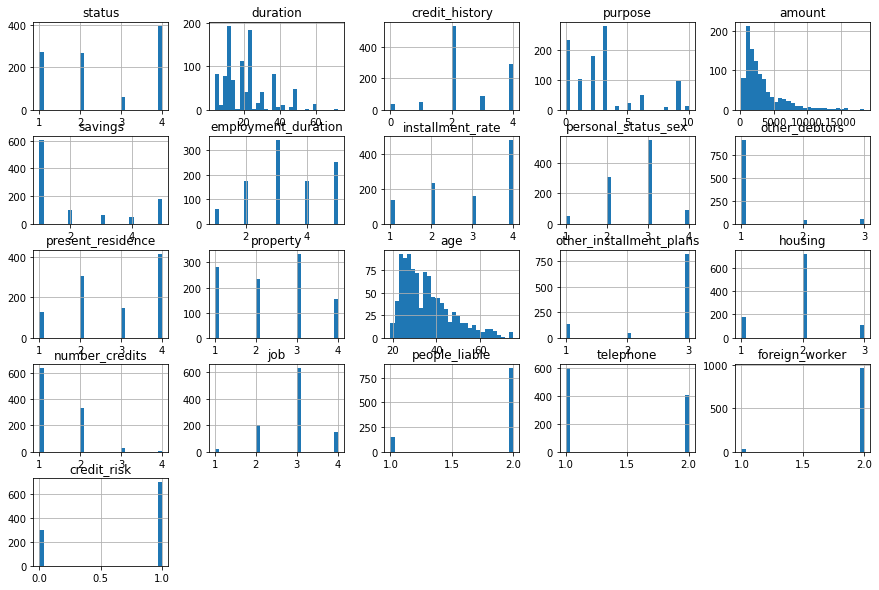

In [128]:
# Plot a histogram for each numerical values in the df
df.hist(bins=30, figsize=(15, 10))

Only age duration and amount are continuous features, rest are equivalent to binary/categorical nominal  variables

<AxesSubplot:>

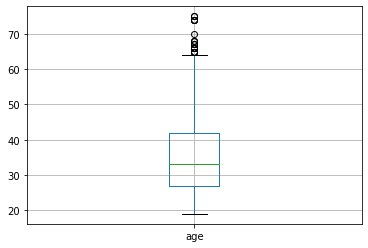

In [129]:
df.boxplot('age')



<AxesSubplot:>

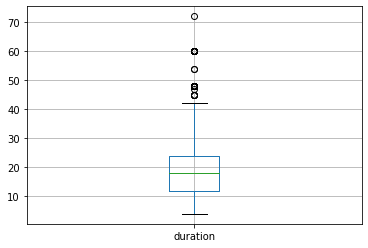

In [130]:
df.boxplot('duration')



<AxesSubplot:>

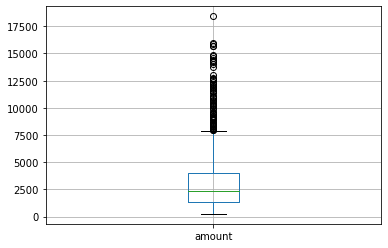

In [131]:
df.boxplot('amount')

<Figure size 432x288 with 0 Axes>

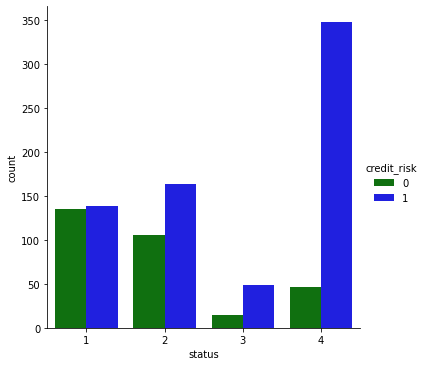

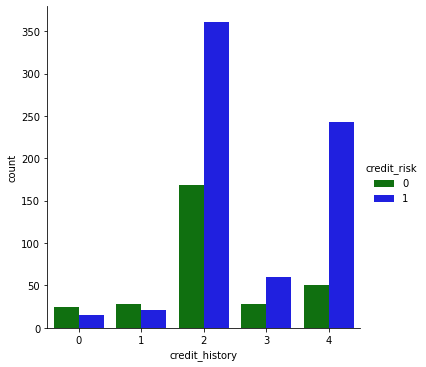

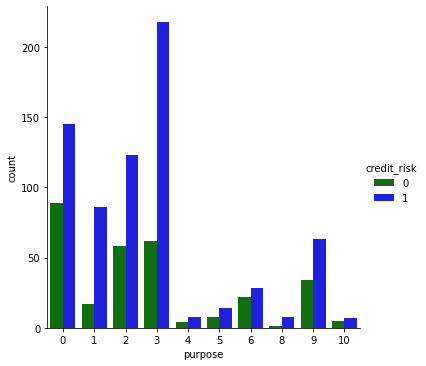

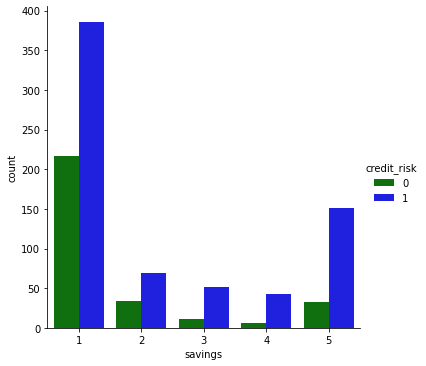

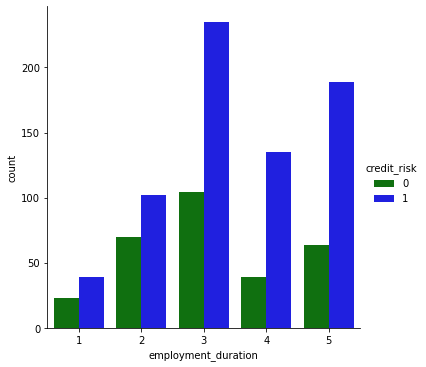

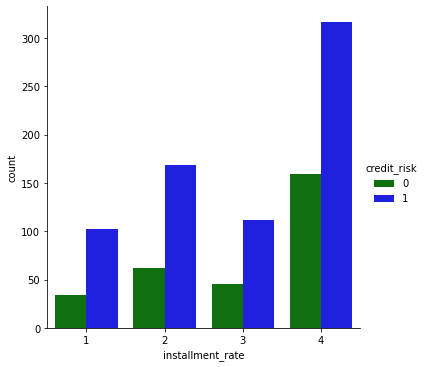

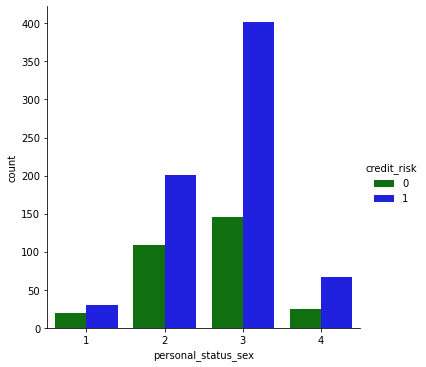

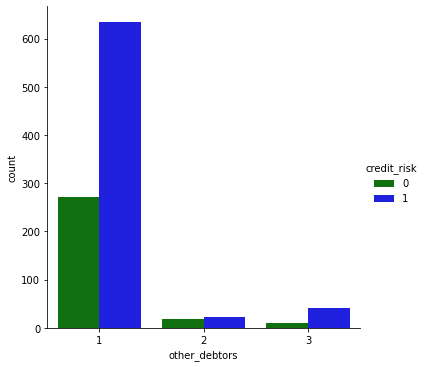

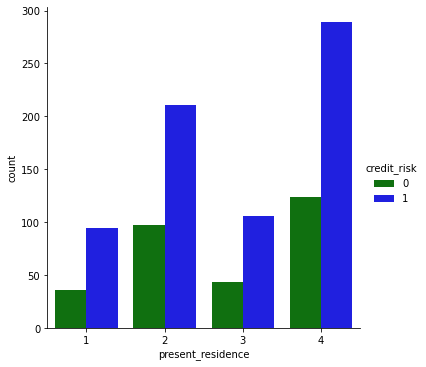

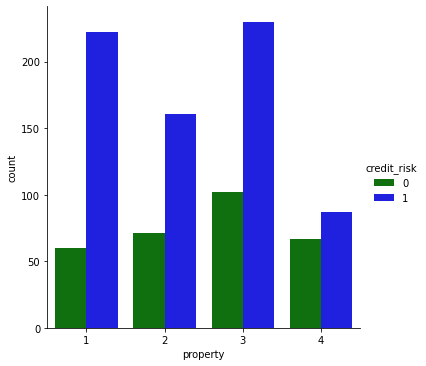

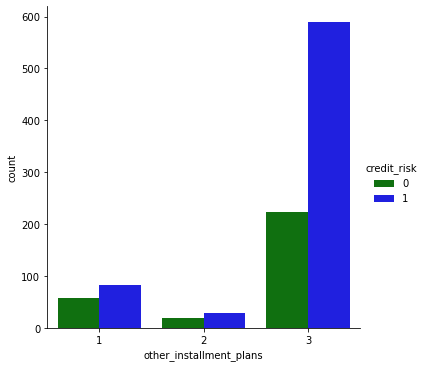

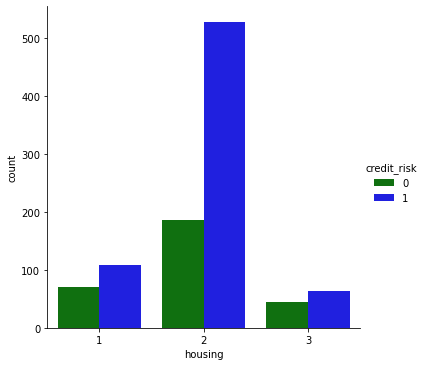

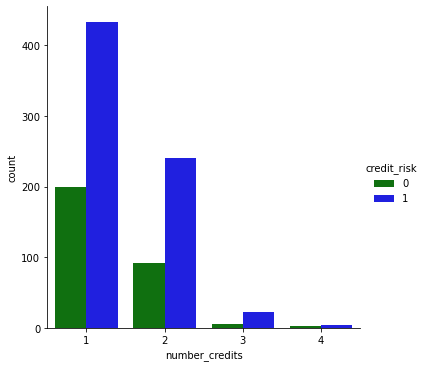

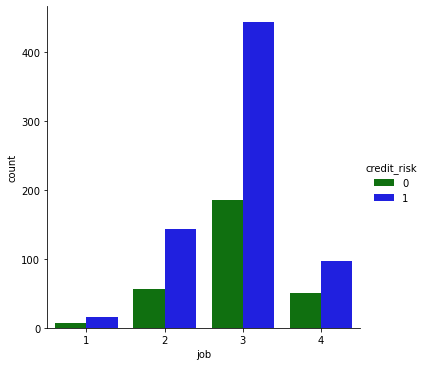

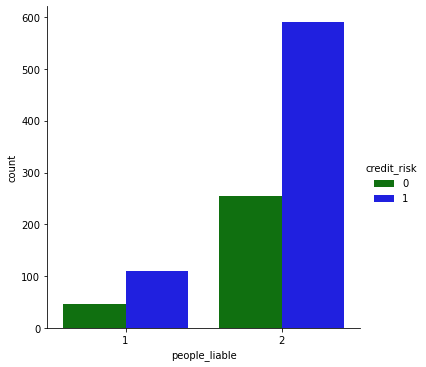

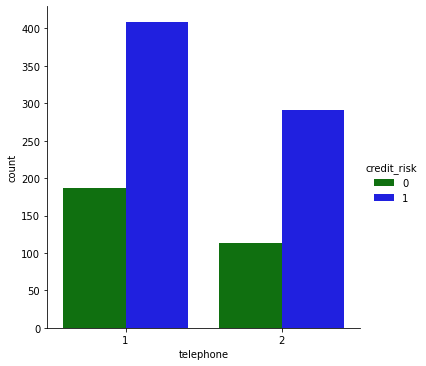

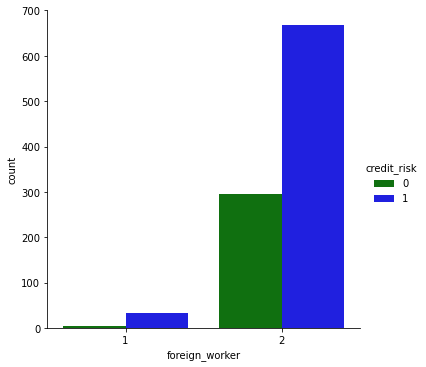

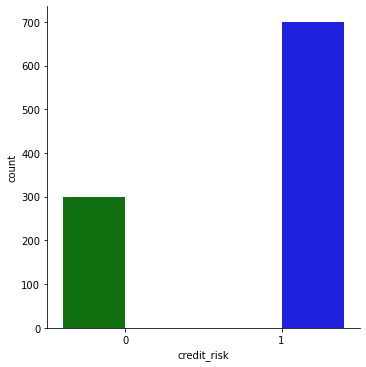

In [132]:
df1=df.drop(['age', 'amount','duration'], axis=1)
for i, col in enumerate(df1.columns):
    plt.figure(i)
    sns.catplot(col, hue="credit_risk", data=df1, kind="count", 
            palette={1:"blue", 0:"green"}, ax=ax)
    
    

In [133]:
#removing sex from the features

data=df.drop(['personal_status_sex'], axis=1)
data=pd.get_dummies(data,columns=['status','credit_history','purpose','savings','employment_duration',
                           'installment_rate','other_debtors','present_residence',
                           'property','other_installment_plans','housing','number_credits','job'
                           ])



Text(0.5, 1.0, 'Good Risk - Amount')

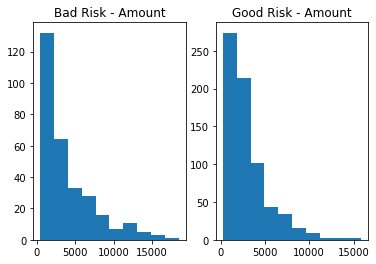

In [134]:
plt.subplot(1, 2, 1)
plt.hist(data[data['credit_risk']==0]['amount'])
plt.title('Bad Risk - Amount')

plt.subplot(1, 2, 2)
plt.hist(data[data['credit_risk']==1]['amount'])
plt.title('Good Risk - Amount')

Amount is positively skewed. To remove the skewness we do a log transform

<AxesSubplot:xlabel='amount', ylabel='Density'>

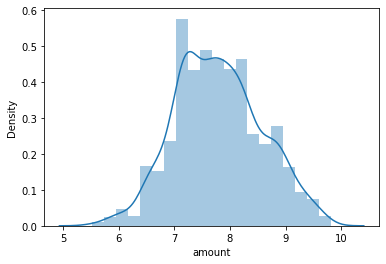

In [135]:
log_amount = np.log(data['amount'])
sns.distplot(log_amount,bins=20)



In [136]:
new_data=data


new_data['log_amount'] = round(np.log(new_data['amount']),2)
new_data['log_age'] =  round(np.log(new_data['age']),2)
new_data['log_duration'] = round(np.log(new_data['duration']),2)
new_data.drop(['amount','age','duration'],axis=1,inplace=True)



In [137]:
new_data = new_data.sample(frac=1).reset_index(drop=True)
X=new_data.drop('credit_risk',axis=1)
y=new_data['credit_risk']

In [138]:
#to keep  the ratio of class labels intact in both training and testing dataset we use a stratified sampling
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=1)

In [139]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
reg = LogisticRegression()
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)

print("Accuracy of the model is :",accuracy_score(y_test, y_pred))
print( pd.crosstab(y_test, y_pred))





Accuracy of the model is : 0.75
col_0         0    1
credit_risk         
0            27   33
1            17  123


# Reproducing Results

### Paper reading
"Fairness Definitions Explained" - Sahil Verma, Julia Rubin

1. Approach used in the paper

1) Data processing
- Language: Python
- Features: total 48 features w. categorical and numerical features
- Categorical features are converted to the sets of binary attributes

2) Model 
- Logistic regression (off-the-shelf)

3) Evaluation
- Performance: 10 fold cross validation w. 90% data for training, 10% data for testing and illustrating definitions
- Fairness evaluation: marriage status and gender combination

@ Source

https://towardsdatascience.com/how-to-develop-a-credit-risk-model-and-scorecard-91335fc01f03
https://machinelearningmastery.com/how-to-configure-k-fold-cross-validation/
https://towardsdatascience.com/what-is-one-hot-encoding-and-how-to-use-pandas-get-dummies-function-922eb9bd4970
https://towardsdatascience.com/logistic-regression-using-python-sklearn-numpy-mnist-handwriting-recognition-matplotlib-a6b31e2b166a

In [140]:
# Libraries for ML
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold, cross_val_score
from sklearn.model_selection import cross_validate

### Reproducing the modelling

In [141]:
# 1) Data processing 

In [142]:
df = pd.read_csv('german_data.csv',sep=';')
# To display the top 5 rows
df.head(5)


,CheckingAcc,Duration,CreditHistory,Purpose,CreditAmount,SavingsAcc,EmploymentStatus,InstallmentRate,PersonalStatus,OtherDebtors,...,Property,Age,OtherInstallment,Housing,ExistingCredits,Job,Dependents,Telephone,ResidenceStatus,CustomerType
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,...,A121,67,A143,A152,2,A173,1,A192,A201,1
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,...,A121,22,A143,A152,1,A173,1,A191,A201,2
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,...,A121,49,A143,A152,1,A172,2,A191,A201,1
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,...,A122,45,A143,A153,1,A173,2,A191,A201,1
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,...,A124,53,A143,A153,2,A173,2,A191,A201,2


In [143]:
df.tail(5) 


,CheckingAcc,Duration,CreditHistory,Purpose,CreditAmount,SavingsAcc,EmploymentStatus,InstallmentRate,PersonalStatus,OtherDebtors,...,Property,Age,OtherInstallment,Housing,ExistingCredits,Job,Dependents,Telephone,ResidenceStatus,CustomerType
995,A14,12,A32,A42,1736,A61,A74,3,A92,A101,...,A121,31,A143,A152,1,A172,1,A191,A201,1
996,A11,30,A32,A41,3857,A61,A73,4,A91,A101,...,A122,40,A143,A152,1,A174,1,A192,A201,1
997,A14,12,A32,A43,804,A61,A75,4,A93,A101,...,A123,38,A143,A152,1,A173,1,A191,A201,1
998,A11,45,A32,A43,1845,A61,A73,4,A93,A101,...,A124,23,A143,A153,1,A173,1,A192,A201,2
999,A12,45,A34,A41,4576,A62,A71,3,A93,A101,...,A123,27,A143,A152,1,A173,1,A191,A201,1


In [144]:
# Checking the data type
df.dtypes

CheckingAcc         object
Duration             int64
CreditHistory       object
Purpose             object
CreditAmount         int64
SavingsAcc          object
EmploymentStatus    object
InstallmentRate      int64
PersonalStatus      object
OtherDebtors        object
ResidenceCurrent     int64
Property            object
Age                  int64
OtherInstallment    object
Housing             object
ExistingCredits      int64
Job                 object
Dependents           int64
Telephone           object
ResidenceStatus     object
CustomerType         int64
dtype: object

In [145]:
cleanup_nums = {"CheckingAcc":     {"A11": "<0", "A12": "<200","A13": ">200", "A14": "no_acc"},
                "CreditHistory": {"A30": "no credits", "A31": "all credits", "A32": "paid back", "A33": "delay in pay back",
                                  "A34": " existing other credits"},
               "Purpose": {"A40": "car (new)","A41": "car (used)","A42": "furniture/equipment",
                           "A43": "radio/television","A44": "domestic appliances","A45": "repairs","A46": "education",
                           "A47": "(vacation - does not exist?)","A48": "retraining","A49": "business","A410": "others"},
                "SavingsAcc":{"A61": "<100", "A62": "100-500","A63": "500-1000", "A64": ">=1000","A65": "no_acc"},
                "EmploymentStatus":{"A71": "unemployed", "A72": "<1","A73": "1-4", "A74": "4-7","A75": ">=7"},
                "PersonalStatus":{"A91": "male : divorced/separated", "A92": "female : divorced/separated/married",
                                  "A93": "male : single", "A94": "male : married/widowed","A95": "female : single"},
                "OtherDebtors":{"A101": "none", "A102": "co-applicant","A103": "guarantor"},
                "Property":{"A121": "real estate", "A122": "society savings","A123": "car or other,","A124": "no property"},
                "OtherInstallment":{"A141": "bank", "A142": "stores","A143": "none"},
                "Housing":{"A151": "rent", "A152": "own","A153": "free"},
                "Job":{"A171": "unskilled - non-resident", "A172": "unskilled - resident","A173": "skilled employee","A174": "self-employed"},
                "Telephone":{"A191": "none", "A192": "yes"},
                "ResidenceStatus":{"A201": "yes", "A202": "no"}
}

In [146]:
df1 = df.replace(cleanup_nums)

In [147]:
# Check the type of features again
df1.dtypes

CheckingAcc         object
Duration             int64
CreditHistory       object
Purpose             object
CreditAmount         int64
SavingsAcc          object
EmploymentStatus    object
InstallmentRate      int64
PersonalStatus      object
OtherDebtors        object
ResidenceCurrent     int64
Property            object
Age                  int64
OtherInstallment    object
Housing             object
ExistingCredits      int64
Job                 object
Dependents           int64
Telephone           object
ResidenceStatus     object
CustomerType         int64
dtype: object

In [148]:
# Null data check
df1.isna().sum()

CheckingAcc         0
Duration            0
CreditHistory       0
Purpose             0
CreditAmount        0
SavingsAcc          0
EmploymentStatus    0
InstallmentRate     0
PersonalStatus      0
OtherDebtors        0
ResidenceCurrent    0
Property            0
Age                 0
OtherInstallment    0
Housing             0
ExistingCredits     0
Job                 0
Dependents          0
Telephone           0
ResidenceStatus     0
CustomerType        0
dtype: int64

In [149]:
# Dependent feature and independent features separation
# In column 'CustomerType', 1: good, 2: Bad -> which is going to be our 'dependent feature'

X = df1.drop('CustomerType', axis = 1)
y = df1['CustomerType']

In [150]:
def dummy_creation(df, columns_list):
    df_dummies = []
    for col in columns_list:
        df_dummies.append(pd.get_dummies(df[col], prefix = col, prefix_sep = ':'))
    df_dummies = pd.concat(df_dummies, axis = 1)
    df = pd.concat([df, df_dummies], axis = 1)
    return df

X = dummy_creation(X, ['CheckingAcc', 'CreditHistory', 'Purpose', 'SavingsAcc',
       'EmploymentStatus', 'PersonalStatus', 'OtherDebtors', 'Property',
       'OtherInstallment', 'Housing', 'Job'])

In [151]:
# Binary attribute - values revision
# 'Telephone'
X['Telephone'] = X['Telephone'].replace({'none':0, 'yes': 1})
X['ResidenceStatus'] = X['ResidenceStatus'].replace({'no': 1, 'yes': 0})

In [152]:
X.drop(columns = ['CheckingAcc', 'CreditHistory', 'Purpose', 'SavingsAcc',
       'EmploymentStatus', 'PersonalStatus', 'OtherDebtors', 'Property',
       'OtherInstallment', 'Housing', 'Job'], inplace = True)

In [153]:
# Dataframe - numerical and binary attributes
X_num = X.select_dtypes(include = ['int64']).copy()
X_obj = X.select_dtypes(include = ['object']).copy()

In [154]:
X.head(5)

,Duration,CreditAmount,InstallmentRate,ResidenceCurrent,Age,ExistingCredits,Dependents,Telephone,ResidenceStatus,CheckingAcc:<0,...,OtherInstallment:bank,OtherInstallment:none,OtherInstallment:stores,Housing:free,Housing:own,Housing:rent,Job:self-employed,Job:skilled employee,Job:unskilled - non-resident,Job:unskilled - resident
0,6,1169,4,4,67,2,1,1,0,1,...,0,1,0,0,1,0,0,1,0,0
1,48,5951,2,2,22,1,1,0,0,0,...,0,1,0,0,1,0,0,1,0,0
2,12,2096,2,3,49,1,2,0,0,0,...,0,1,0,0,1,0,0,0,0,1
3,42,7882,2,4,45,1,2,0,0,1,...,0,1,0,1,0,0,0,1,0,0
4,24,4870,3,4,53,2,2,0,0,1,...,0,1,0,1,0,0,0,1,0,0


In [155]:
# To retrieve the coefficients afterwards, we restore the column index number of PersonalStatus attribute
cname = X.filter(regex='PersonalStatus').columns
protected_index = {}
for i in range(len(cname)): 
    protected_index[cname[i]] = X.columns.get_loc(cname[i])
print(protected_index)

{'PersonalStatus:female : divorced/separated/married': 38, 'PersonalStatus:male : divorced/separated': 39, 'PersonalStatus:male : married/widowed': 40, 'PersonalStatus:male : single': 41}


Even though following the instruction of the paper, the number of the features is not the same as the instruction. This is probably because of the method for converting categorical attributes into binary attributes was different.

In [156]:
# 2), 3) Modelling and evaluation - Logistic Regression 

In [157]:
# Logistic Regression model
logisticRegr = LogisticRegression()
cv_results = cross_validate(logisticRegr, X, y, cv=10, return_estimator=True)

In [158]:
# Check the protected_attribute index from the dictionary
p_index = list(protected_index.keys())
protected_index[p_index[0]] = 0
protected_index[p_index[1]] = 0
protected_index[p_index[2]] = 0
protected_index[p_index[3]] = 0

for model in cv_results['estimator']:
    protected_index[p_index[0]] += model.coef_[0][38]
    protected_index[p_index[1]] += model.coef_[0][39]
    protected_index[p_index[2]] += model.coef_[0][40]
    protected_index[p_index[3]] += model.coef_[0][41]

protected_index[p_index[0]] = protected_index[p_index[0]]/10
protected_index[p_index[1]] = protected_index[p_index[1]]/10
protected_index[p_index[2]] = protected_index[p_index[2]]/10
protected_index[p_index[3]] = protected_index[p_index[3]]/10

print(protected_index)

{'PersonalStatus:female : divorced/separated/married': 0.11405347478630909, 'PersonalStatus:male : divorced/separated': 0.12515224474217065, 'PersonalStatus:male : married/widowed': -0.08386241379326934, 'PersonalStatus:male : single': -0.34995550086800026}


In [159]:
pd.DataFrame(protected_index.items(), columns =['PersonalStatus', 'coef'])

,PersonalStatus,coef
0,PersonalStatus:female : divorced/separated/mar...,0.114053
1,PersonalStatus:male : divorced/separated,0.125152
2,PersonalStatus:male : married/widowed,-0.083862
3,PersonalStatus:male : single,-0.349956


* The coefficients values are also different from the paper. This is probably due to the different number of features used for model training. 

# Feedback for reproducibility
- There are three main points to be concerned to guarantee reproducibility by the side of data scientist. They are 1) support of using data 2) support of sharing the research and 3) support understanding the research. 

- In case of this paper, which used the data that is uploaded in UCI ML repository so that 1), 2) support was successfully done.

- However in terms of the 3) support understanding the research could be improved. Referring to the stages of reproducibility workflow, 

In the second stage - Data processing, the belows should be mentioned.
1) Libraries used
    
2) Methods used for feature engineering

3) Existence of manual status

In the third stage - Data Analysis, it is helpful to share the followings.
1) Tools/Environment/Libraries used for the selected machine learning model 

2) Head rows of the final analysed result table